# pseudo-code in python for span SMS classification using semantic representation LSA
# Construct SMS spam elimination algorithm steps using the LSA model.
# How the LSA model is used for the classification of SMS spam. Use python packages with code fractions to explain the model.

# dataset@
## https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

# HA-3
### 1. Tell how polysemy, homonyms and zeugma impact the outcome of a text-based NLP application. 
### 2. Judge the effects of homographs and homophones in chatbot voice-based applications.
### 3.What is the function of t-NSE representation and its role in the analysis of NLP pipelines.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


The dataset contains three unnamed columns with null values. 
Drop those columns 
Rename the columns v1 and v2 to label and Text. 
Since the target variable is in string form, we will encode it numerically using pandas function .map().

In [3]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df = df.rename(columns={'v1':'label','v2':'text'})
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['label_enc'] = df['label'].map({'ham':0, 'spam':1})
df.head()

,label,text,label_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


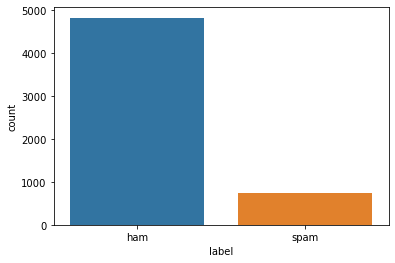

In [6]:
sns.countplot(x = df['label'])
plt.show()

# The ham data is comparatively higher than spam data, it’s natural. Since we are going to use embeddings in our deep learning model, we need not balance the data. Now, let’s find the average number of words in all the sentences in SMS data.

# Find average number of tokens in all sentences

In [7]:
avg_words_len = round(sum([len(i.split()) for i in df['text']])/len(df['text']))
avg_words_len

15

#  find the total number of unique words in the corpus

In [8]:
s = set()
for sent in df['text']:
    for word in sent.split():
        s.add(word)
    total_words_len = len(s)
total_words_len

15585

#  split the data into training and testing parts using train_test_split() function.

In [17]:
from sklearn.model_selection import train_test_split
X, y = np.asanyarray(df['text']), np.asanyarray(df['label_enc'])
new_df = pd.DataFrame({'Text':X, 'Label': y})
new_df.head()
#X_train, X_test, y_train, y_test = train_test_split(new_df['text'],new_df['label'], test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(new_df['Text'],
                                                   new_df['Label'],
                                                   test_size = 0.2,
                                                   random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4457,), (4457,), (1115,), (1115,))

# """ Build the model with tfidf features using NB classifier"""

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [19]:
X_train = [str(item) for item in X_train]
X_test = [str(item) for item in X_test]
#X_train

In [20]:
tfidfvects = TfidfVectorizer().fit(X_train)
X_train_vec,X_test_vec = tfidfvects.transform(X_train),tfidfvects.transform(X_test)
print(X_train_vec)

  (0, 7674)	0.2780580098469636
  (0, 6786)	0.12427677819754165
  (0, 6455)	0.21083615486777574
  (0, 5872)	0.26710534096823246
  (0, 4988)	0.1903904544048287
  (0, 4912)	0.15957326527314455
  (0, 4773)	0.17659786192165677
  (0, 4661)	0.3714150879090969
  (0, 4646)	0.14901928724105368
  (0, 4549)	0.3610761139104893
  (0, 4390)	0.14278469554070108
  (0, 3637)	0.1356900314797867
  (0, 3416)	0.22465058036136068
  (0, 3308)	0.2780580098469636
  (0, 1758)	0.2736419760203263
  (0, 1415)	0.3714150879090969
  (0, 1105)	0.16911106738950407
  (1, 7152)	0.13192690604552595
  (1, 6781)	0.11591125876695066
  (1, 6639)	0.27079885833944156
  (1, 6494)	0.2473832281421039
  (1, 5178)	0.177668342459472
  (1, 5126)	0.18685470215123204
  (1, 5003)	0.1828758011561768
  (1, 4986)	0.15977442079298718
  :	:
  (4452, 1833)	0.29751311096286004
  (4452, 1628)	0.3213332406530875
  (4452, 1608)	0.1741191267977231
  (4452, 1298)	0.2860990438603183
  (4453, 6299)	0.5422825367621465
  (4453, 4147)	0.4831266135229213
 

# %% Train the Bayes classifier Model

In [21]:
baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec,y_train)
y_pred = baseline_model.predict(X_test_vec)
nb_accuracy = accuracy_score(y_test, y_pred)
print(nb_accuracy)
print(classification_report(y_test, y_pred))

0.9623318385650225
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



# %% Plot Confusion Matrix

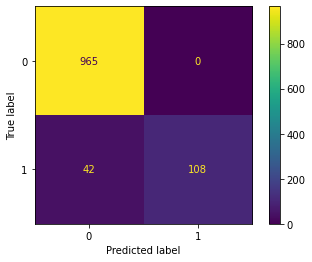

In [22]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(baseline_model,X_test_vec, y_test)